### Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from utils.data import load_file
from utils.metrics import evaluate

In [2]:
y_train = load_file("y_train.pickle")

X_train_uni = load_file("X_train_uni.pickle")
X_test_uni = load_file("X_test_uni.pickle")

X_train_uni_sw = load_file("X_train_uni_sw.pickle")
X_test_uni_sw = load_file("X_test_uni_sw.pickle")

X_train_bi = load_file("X_train_bi.pickle")
X_test_bi = load_file("X_test_bi.pickle")

X_train_bi_sw = load_file("X_train_bi_sw.pickle")
X_test_bi_sw = load_file("X_test_bi_sw.pickle")

X_train_uni_bi = load_file("X_train_uni_bi.pickle")
X_test_uni_bi = load_file("X_test_uni_bi.pickle")

X_train_uni_bi_sw = load_file("X_train_uni_bi_sw.pickle")
X_test_uni_bi_sw = load_file("X_test_uni_bi_sw.pickle")

### Modeling

Define parameter settings to try.

In [3]:
C_range = np.logspace(-2, 2, 5)
C_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [4]:
param_grid = {"C": C_range}

Create a function to create a new instance of grid search with 10-fold cross-validation.

Note: L2 regularization is used as default parameter in `LinearSVC`.

In [5]:
def create_grid_search():
  model = LinearSVC(class_weight="balanced", random_state=42, max_iter=10000)
  grid_search = GridSearchCV(model, param_grid=param_grid, cv=10, scoring="balanced_accuracy")
  return grid_search

Create a function to perform training and evaluation.

In [6]:
def train_evaluate(X_train, X_test):
  grid_search = create_grid_search()
  grid_search.fit(X_train, y_train)
  
  print("Best Parameters:")
  print(grid_search.best_params_)

  y_pred = grid_search.predict(X_test)
  evaluate(y_pred)

#### Unigrams

Best Parameters:
{'C': 0.1}
Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      1770
     neutral       0.37      0.29      0.33       428
    positive       0.93      0.95      0.94      4135

    accuracy                           0.88      6333
   macro avg       0.72      0.71      0.71      6333
weighted avg       0.88      0.88      0.88      6333

Confusion Matrix:


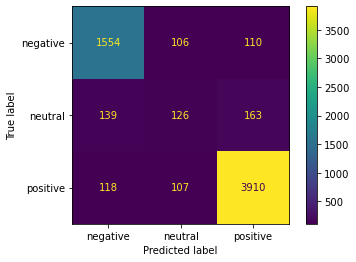

In [7]:
train_evaluate(X_train_uni, X_test_uni)

#### Unigrams + Stop Words

Best Parameters:
{'C': 0.1}
Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.89      0.88      1770
     neutral       0.42      0.37      0.39       428
    positive       0.95      0.94      0.95      4135

    accuracy                           0.89      6333
   macro avg       0.74      0.74      0.74      6333
weighted avg       0.89      0.89      0.89      6333

Confusion Matrix:


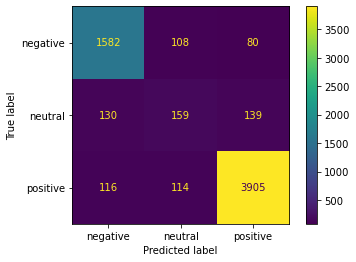

In [8]:
train_evaluate(X_train_uni_sw, X_test_uni_sw)

#### Bigrams

Best Parameters:
{'C': 10.0}
Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.75      0.80      1770
     neutral       0.36      0.04      0.06       428
    positive       0.85      0.98      0.91      4135

    accuracy                           0.85      6333
   macro avg       0.69      0.59      0.59      6333
weighted avg       0.82      0.85      0.82      6333

Confusion Matrix:


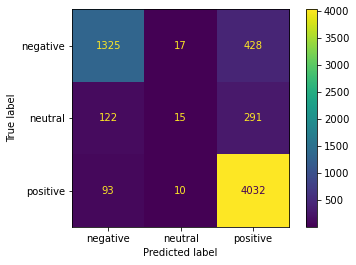

In [9]:
train_evaluate(X_train_bi, X_test_bi)

#### Bigrams + Stop Words

Best Parameters:
{'C': 1.0}
Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.89      0.88      1770
     neutral       0.42      0.12      0.19       428
    positive       0.92      0.97      0.94      4135

    accuracy                           0.89      6333
   macro avg       0.73      0.66      0.67      6333
weighted avg       0.87      0.89      0.87      6333

Confusion Matrix:


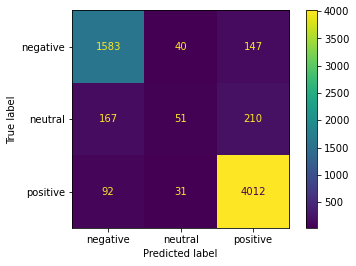

In [10]:
train_evaluate(X_train_bi_sw, X_test_bi_sw)

#### Unigrams + Bigrams

Best Parameters:
{'C': 0.1}
Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      1770
     neutral       0.43      0.24      0.31       428
    positive       0.92      0.96      0.94      4135

    accuracy                           0.89      6333
   macro avg       0.74      0.69      0.71      6333
weighted avg       0.87      0.89      0.88      6333

Confusion Matrix:


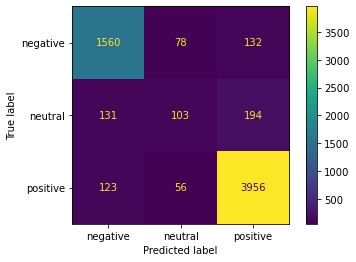

In [11]:
train_evaluate(X_train_uni_bi, X_test_uni_bi)

#### Unigrams + Bigrams + Stop Words

Best Parameters:
{'C': 0.1}
Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.91      0.88      1770
     neutral       0.43      0.27      0.33       428
    positive       0.94      0.96      0.95      4135

    accuracy                           0.90      6333
   macro avg       0.74      0.71      0.72      6333
weighted avg       0.88      0.90      0.89      6333

Confusion Matrix:


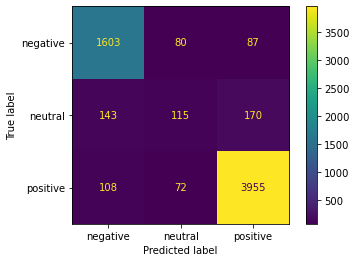

In [12]:
train_evaluate(X_train_uni_bi_sw, X_test_uni_bi_sw)